# Example 1 
## Load toy Datasets and do some basic statistics
Lets try the iris toy dataset from scikit-learn. 

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
from pprint import pprint
import matplotlib.pyplot as plt
import math

In [4]:
df = load_iris(as_frame=True)
df_colms = df.keys()
print(df_colms)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
data = df.data
target = df.target
targetNames = df.target_names
features = df.feature_names
DESCR = df.DESCR
dataModule = df.data_module
filename = df.filename
frame = df.frame

In [6]:
frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# The Middle

* Mean: Average $\mu = \sum_{i}^{n} \frac{x_{i}}{n}$
* Median: Middle. There are the same number of records before and after.
* Mode(s): Most common value(s).

In [7]:
print(f'{("Feature" + " "*30)[:31]} Mean   Sum/Size   Median      Mode(s)')
for feature in features:
    colm = data[feature]
    mode = '(' + str(colm.mode())
    mode = mode.replace('\nName', '  Name')[:mode.find("\nName")]
    mode = mode.replace('\n', ') , (') + ')'
    print(f'{(feature+" "*30)[:29]}', end=' | ')
    print(f' {round(colm.mean(), 1)}', end='  | ')
    print(f' {round(colm.sum()/colm.size, 1)}', end='   | ')
    print(f' {round(colm.median(), 1)}', end='     | ')
    print(f' {mode}')


Feature                         Mean   Sum/Size   Median      Mode(s)
sepal length (cm)             |  5.8  |  5.8   |  5.8     |  (0    5.0)
sepal width (cm)              |  3.1  |  3.1   |  3.0     |  (0    3.0)
petal length (cm)             |  3.8  |  3.8   |  4.3     |  (0    1.4) , (1    1.5)
petal width (cm)              |  1.2  |  1.2   |  1.3     |  (0    0.2)


# Variability:

* Range

In [8]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end=' ')
    print(f'Range: [{colm.min()},{colm.max()}]')

sepal length (cm) Range: [4.3,7.9]
sepal width (cm) Range: [2.0,4.4]
petal length (cm) Range: [1.0,6.9]
petal width (cm) Range: [0.1,2.5]


* Standard Deviation: $\sigma = \sqrt{\sum_{i}^{n}{\dfrac{(x_{i}-\mu)^{2}}{n-1}}}$

In [9]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end=' ')
    print(f'SD: {round(colm.std(),2)}') 

sepal length (cm) SD: 0.83
sepal width (cm) SD: 0.44
petal length (cm) SD: 1.77
petal width (cm) SD: 0.76


* Draw Histograms of Features to better understand data

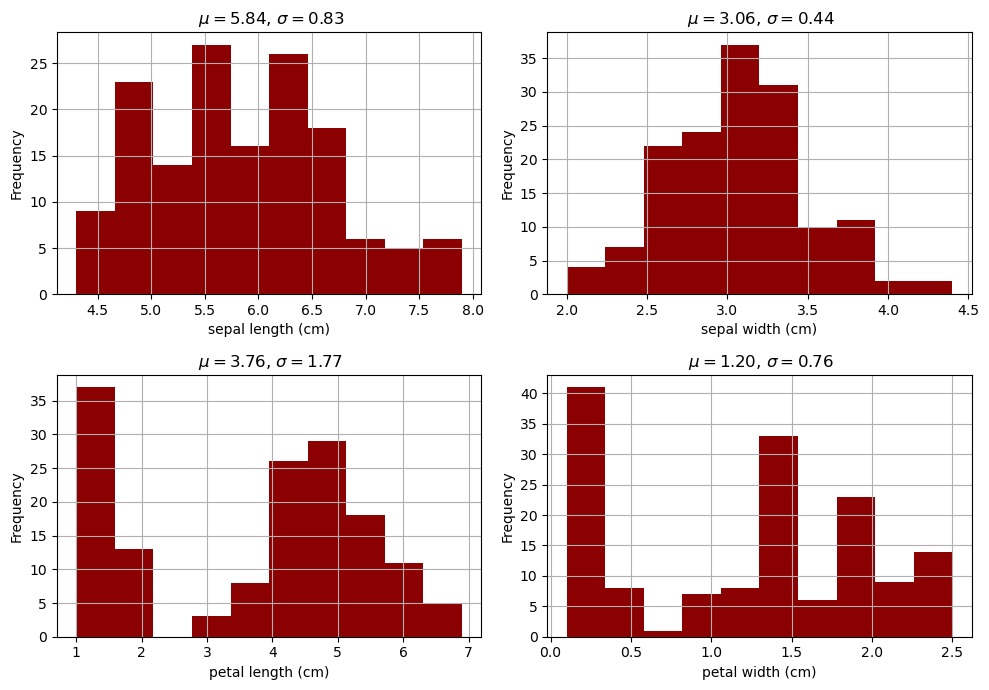

In [38]:
h =[]
nfeatures = len(features)
f = plt.figure(figsize=(10,1.75*nfeatures))
for nth_feat, feature in enumerate(features):
    plt.subplot(int(nfeatures/2), 2, nth_feat+1)
    colm = data[feature]
    hsub = h.append(colm.hist(color='darkRed'))
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    mu = colm.mean()
    sigma = colm.std()
    plt.title(f" $\mu = {mu:.2f}$, $\sigma = {sigma:.2f}$ ")
plt.tight_layout()
plt.show()
plt.close()


* Draw scatter plots of featurees to see correlations

<Figure size 2000x2000 with 0 Axes>

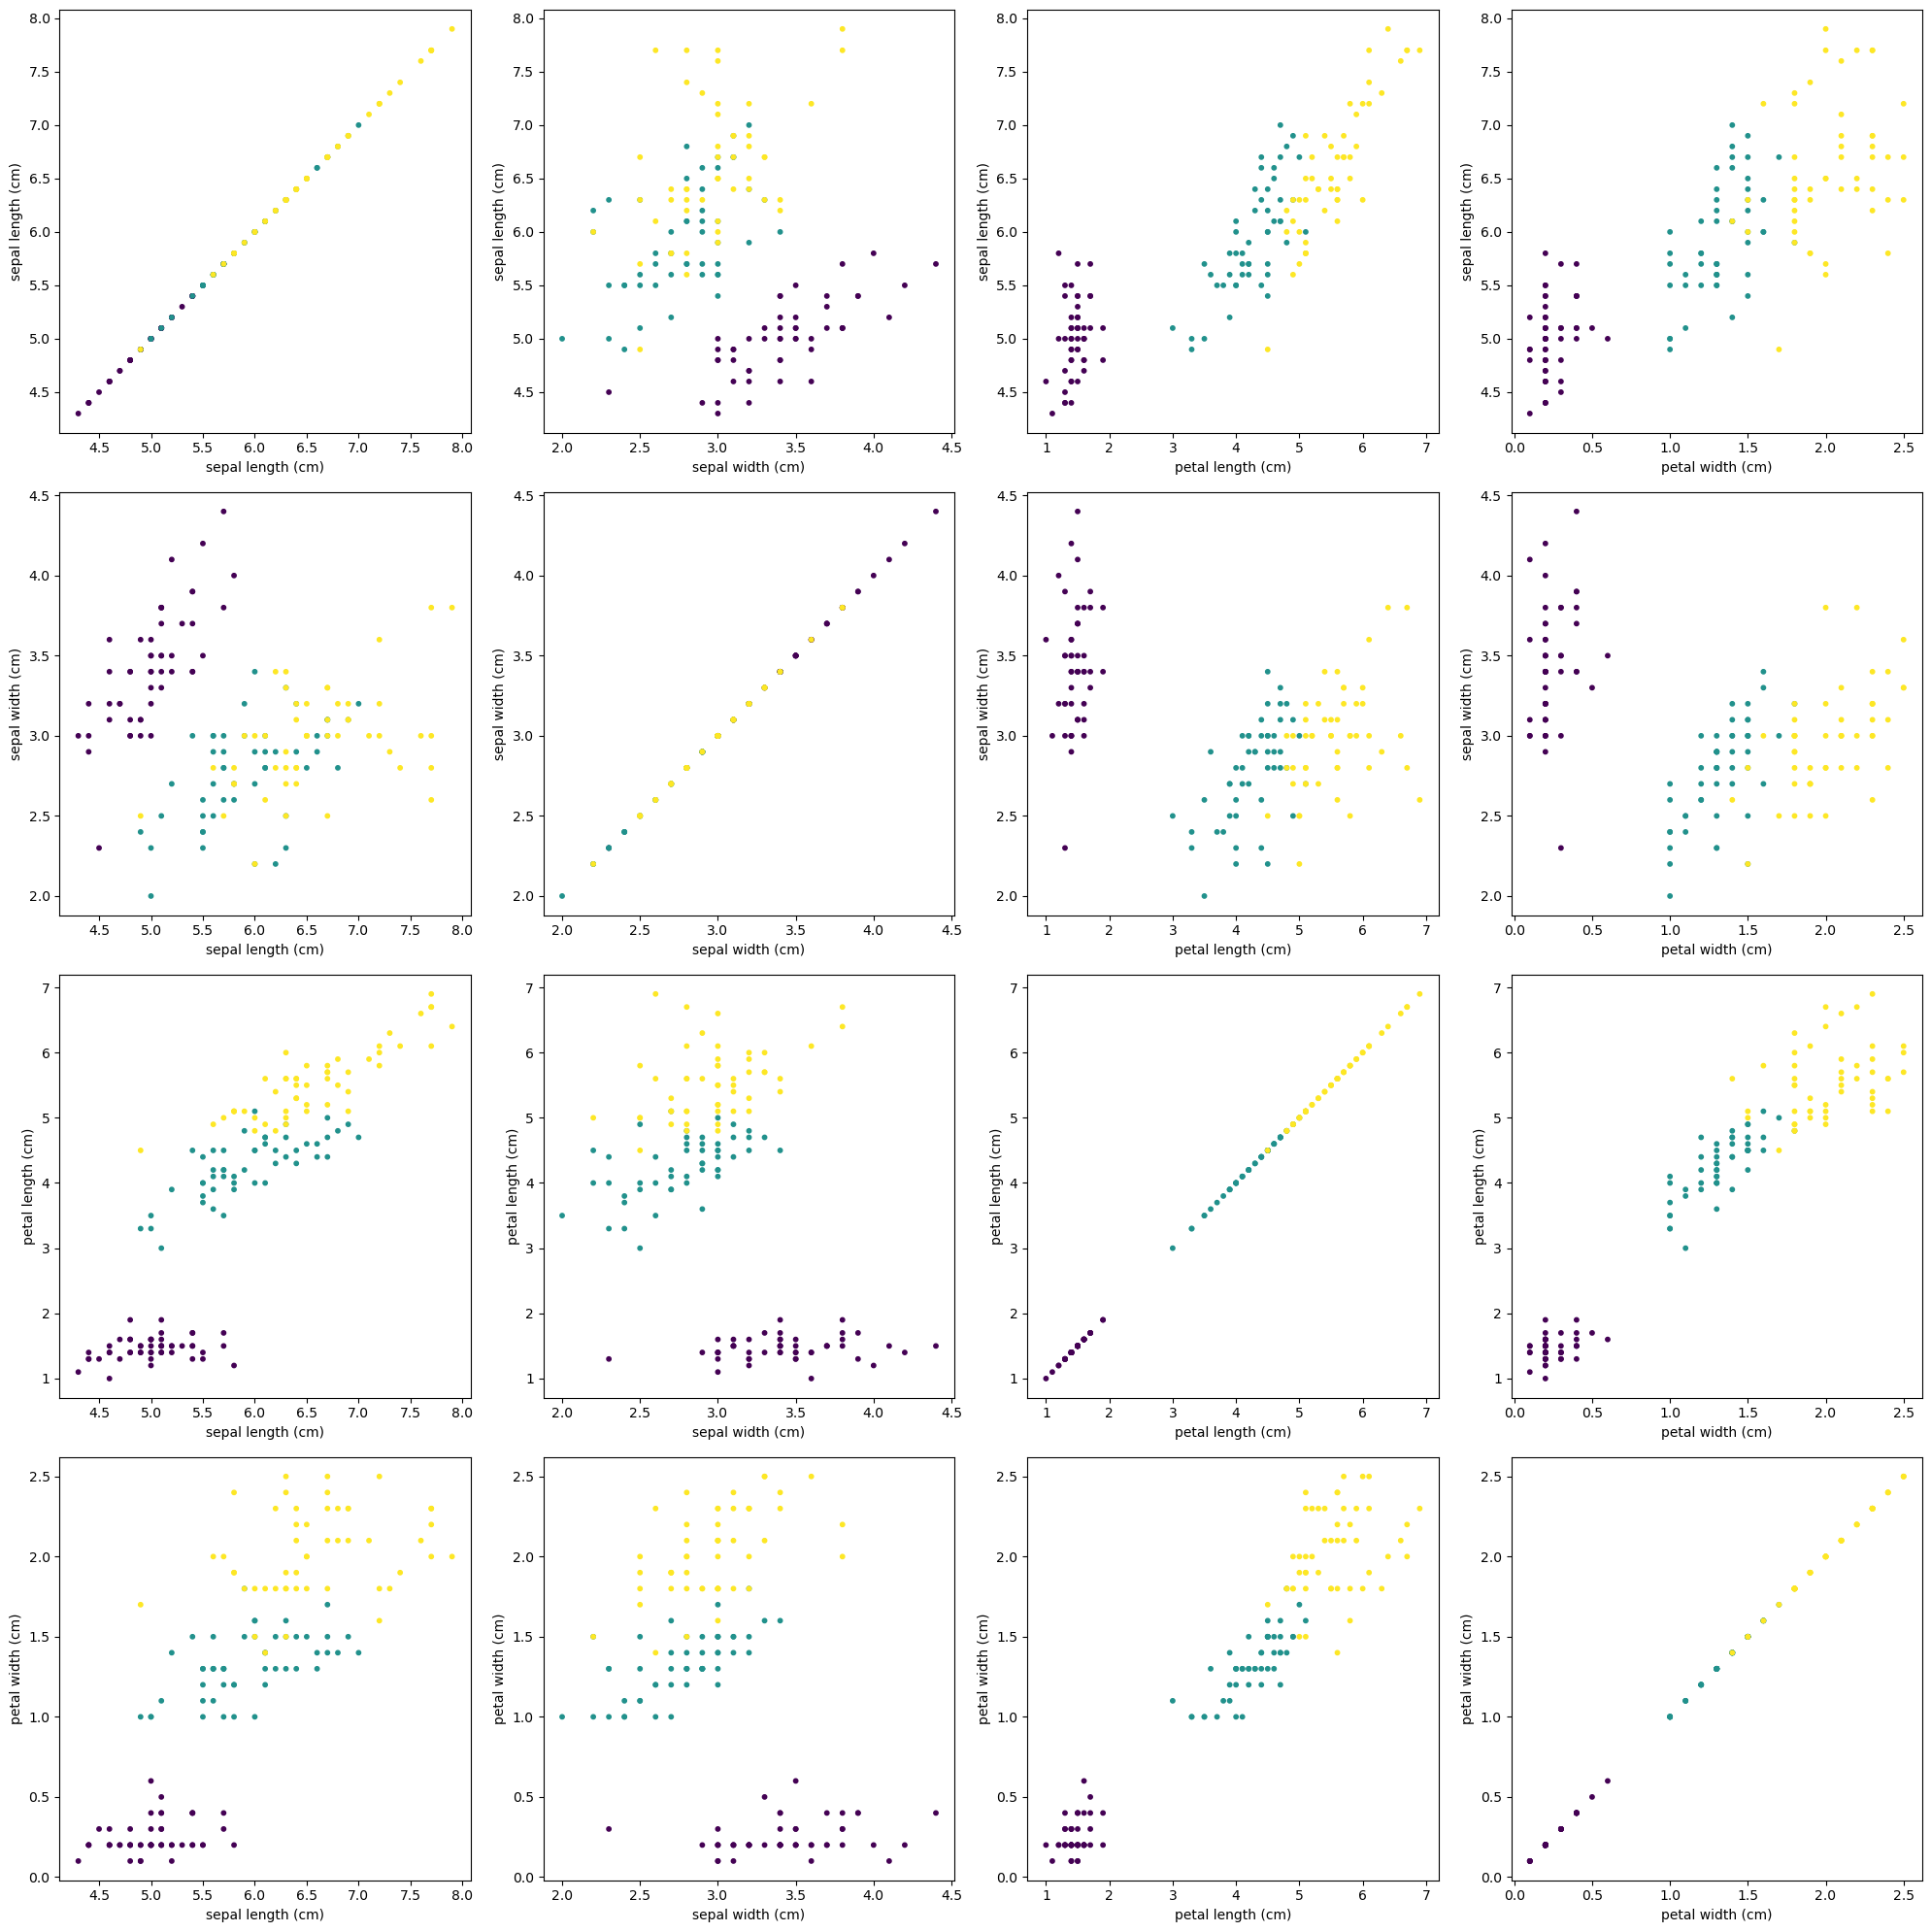

In [11]:
f = plt.figure(figsize=(5*nfeatures,5*nfeatures))
f, axes = plt.subplots(nfeatures, nfeatures, figsize=(5*nfeatures,5*nfeatures))
for nth_featVert, featureVert in enumerate(features):
    for nth_feat, feature in enumerate(features):
        axes[nth_featVert][nth_feat].scatter(x=frame[feature], y=frame[featureVert], c=frame["target"], s=10)
        axes[nth_featVert][nth_feat].set_xlabel(feature)
        axes[nth_featVert][nth_feat].set_ylabel(featureVert)
plt.tight_layout()
plt.show()
plt.close()

* Draw Probability Density Functions (PDFs)

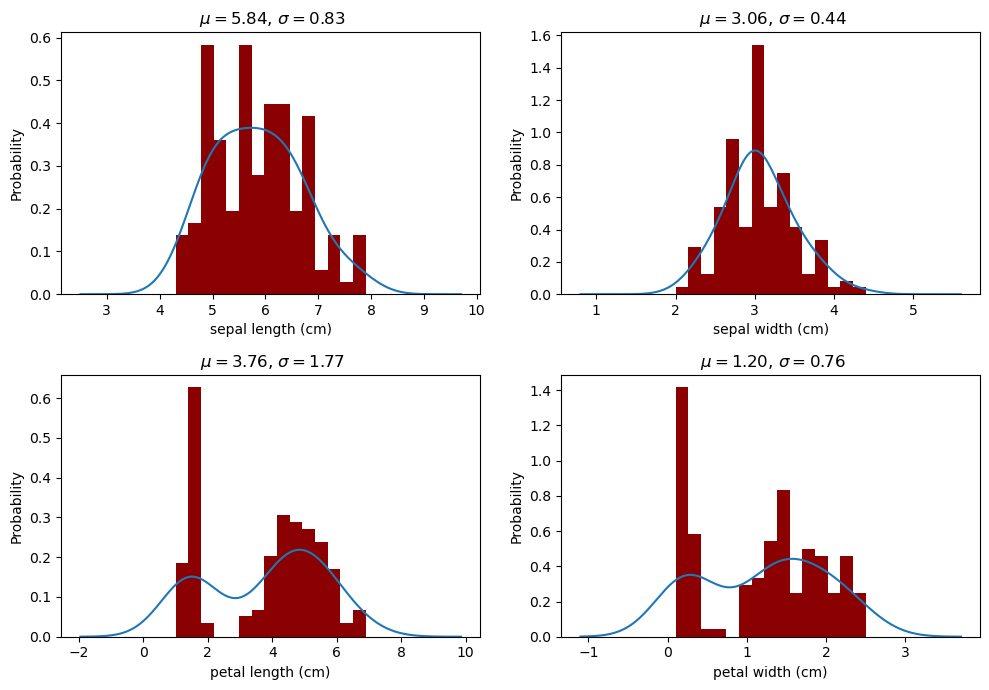

In [36]:
h =[]
nfeatures = len(features)
f = plt.figure(figsize=(10,1.75*nfeatures))
for nth_feat, feature in enumerate(features):
    plt.subplot(int(nfeatures/2), 2, nth_feat+1)
    colm = data[feature]
    hsub = h.append(colm.hist(color='darkRed', density=True, bins=15))
    colm.plot.kde(bw_method=0.5) # estimate pdf using Kernel Density Estimation (KDE)
    plt.xlabel(feature)
    plt.ylabel("Probability")
    mu = colm.mean()
    sigma = colm.std()
    plt.title(f" $\mu = {mu:.2f}$, $\sigma = {sigma:.2f}$ ")
plt.tight_layout()
plt.show()
plt.close()

In [39]:
# from statsmodels.distributions.empirical_distribution import ECDF

ModuleNotFoundError: No module named 'statsmodels'